# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import time
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# #  ( example JSON)Seeing what the Json looks like to I know what keys to grab from JSON ( example JSON)
# url = "http://api.openweathermap.org/data/2.5/weather?"
# city = "London"

# # Build query URL
# query_url = url + "appid=" + weather_api_key + "&q=" + city

# # Get weather data
# weather_response = requests.get(query_url)
# weather_json = weather_response.json()

# # Get the temperature from the response
# # print(f"The weather API responded with: {weather_json}.")
# pprint (weather_json)

In [4]:
# create empty list from data from API to be stored 
city_name =[]
temperature = []
max_temp =[]
cloudiness =[]
humidity =[]
country =[]
wind_speed = []
latitude =[]
longitude =[]
datetime=[]

# Counters
city_counter =1
set_counter =1 

In [5]:
print("Beginning Data Retrieval")
print("---------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# For loop to receive API info on each city in Cities list above

for  x,city in enumerate (cities):
    
     # Group cities as sets of 50s
#    if (x % == 0 and  x >= 50):
        #set_counter += 1
        #city_counter = 1
    response =requests.get(query_url + city).json()
    #slowling down API calls to less than 60 per minute to not go over
    time.sleep(1)
    # Print Results
    print(f"Processing Record {city_counter} of Set {set_counter} : {city}")
    
    #Increase Counter
    city_counter+=1
    
    if (x % 49 == 0 and x != 0):
        set_counter += 1
        city_counter = 1
    
    try:
        city_name.append(response["name"])
        temperature.append(response["main"]["temp"])
        max_temp.append(response["main"]["temp_max"])
        cloudiness.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        country.append(response["sys"]["country"])
        wind_speed.append(response["wind"]["speed"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        datetime.append(response["dt"])
#         print(f"Processing Record {x} : {city}")
#         x+=1
    except:
        print ("City not found. Skipping...")    
        pass
    
print("Done")

Beginning Data Retrieval
---------------------------
Processing Record 1 of Set 1 : praya
Processing Record 2 of Set 1 : arraial do cabo
Processing Record 3 of Set 1 : longyearbyen
Processing Record 4 of Set 1 : benguela
Processing Record 5 of Set 1 : busselton
Processing Record 6 of Set 1 : punta arenas
Processing Record 7 of Set 1 : ponta do sol
Processing Record 8 of Set 1 : ushuaia
Processing Record 9 of Set 1 : sao joao da barra
Processing Record 10 of Set 1 : atuona
Processing Record 11 of Set 1 : chagda
City not found. Skipping...
Processing Record 12 of Set 1 : turki
Processing Record 13 of Set 1 : albany
Processing Record 14 of Set 1 : rikitea
Processing Record 15 of Set 1 : miragoane
Processing Record 16 of Set 1 : clyde river
Processing Record 17 of Set 1 : cape town
Processing Record 18 of Set 1 : tshikapa
Processing Record 19 of Set 1 : kruisfontein
Processing Record 20 of Set 1 : khatanga
Processing Record 21 of Set 1 : kodinsk
Processing Record 22 of Set 1 : yantzaza
Pro

Processing Record 37 of Set 4 : mys shmidta
City not found. Skipping...
Processing Record 38 of Set 4 : bowen
Processing Record 39 of Set 4 : marcona
City not found. Skipping...
Processing Record 40 of Set 4 : virginia beach
Processing Record 41 of Set 4 : puerto lempira
Processing Record 42 of Set 4 : macau
Processing Record 43 of Set 4 : ilulissat
Processing Record 44 of Set 4 : victoria
Processing Record 45 of Set 4 : olafsvik
Processing Record 46 of Set 4 : provideniya
Processing Record 47 of Set 4 : cherepovets
Processing Record 48 of Set 4 : puerto escondido
Processing Record 49 of Set 4 : kalmunai
Processing Record 1 of Set 5 : mashhad
Processing Record 2 of Set 5 : dordrecht
Processing Record 3 of Set 5 : mahebourg
Processing Record 4 of Set 5 : antalaha
Processing Record 5 of Set 5 : dwarka
Processing Record 6 of Set 5 : qasigiannguit
Processing Record 7 of Set 5 : deep river
Processing Record 8 of Set 5 : luderitz
Processing Record 9 of Set 5 : faanui
Processing Record 10 of 

Processing Record 30 of Set 8 : mrirt
City not found. Skipping...
Processing Record 31 of Set 8 : kelvington
Processing Record 32 of Set 8 : marolambo
Processing Record 33 of Set 8 : collie
Processing Record 34 of Set 8 : berlevag
Processing Record 35 of Set 8 : cascais
Processing Record 36 of Set 8 : ilabaya
Processing Record 37 of Set 8 : paranga
Processing Record 38 of Set 8 : halalo
City not found. Skipping...
Processing Record 39 of Set 8 : constitucion
Processing Record 40 of Set 8 : padang
Processing Record 41 of Set 8 : zlatoustovsk
City not found. Skipping...
Processing Record 42 of Set 8 : george
Processing Record 43 of Set 8 : mangrol
Processing Record 44 of Set 8 : kadykchan
City not found. Skipping...
Processing Record 45 of Set 8 : sioux lookout
Processing Record 46 of Set 8 : malanje
Processing Record 47 of Set 8 : mehtar lam
Processing Record 48 of Set 8 : sao felix do xingu
Processing Record 49 of Set 8 : karaul
City not found. Skipping...
Processing Record 1 of Set 9 

Processing Record 22 of Set 12 : iquique
Processing Record 23 of Set 12 : ambilobe
Processing Record 24 of Set 12 : khilok
Processing Record 25 of Set 12 : walvis bay
Processing Record 26 of Set 12 : fujin
Processing Record 27 of Set 12 : sabang
Processing Record 28 of Set 12 : faya
Processing Record 29 of Set 12 : oussouye
Processing Record 30 of Set 12 : nabire
Processing Record 31 of Set 12 : flinders
Processing Record 32 of Set 12 : la rioja
Processing Record 33 of Set 12 : port alberni
Processing Record 34 of Set 12 : lake havasu city
Processing Record 35 of Set 12 : foam lake
Processing Record 36 of Set 12 : lleida
Processing Record 37 of Set 12 : santa eulalia del rio
City not found. Skipping...
Processing Record 38 of Set 12 : morgantown
Processing Record 39 of Set 12 : golspie
Processing Record 40 of Set 12 : strezhevoy
Processing Record 41 of Set 12 : mulege
Processing Record 42 of Set 12 : pontal do parana
Processing Record 43 of Set 12 : rafaela
Processing Record 44 of Set 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
city_data = pd.DataFrame(list(zip(city_name,temperature,max_temp,cloudiness,humidity,country,wind_speed,latitude,longitude,datetime)),
                        columns = ["City Name", "Tempature", "Max Tempature", "Cloudiness", "Humidity", "Country","Wind Speed","Latitude","Longitude", "Date/Time"])
city_data.head(20)

,City Name,Tempature,Max Tempature,Cloudiness,Humidity,Country,Wind Speed,Latitude,Longitude,Date/Time
0,Praia,68.00,68.00,75,68,CV,18.41,14.9215,-23.5087,1612577498
1,Arraial do Cabo,74.88,74.88,100,96,BR,14.00,-22.9661,-42.0278,1612577225
2,Longyearbyen,24.80,24.80,75,86,SJ,10.36,78.2186,15.6401,1612577164
3,Benguela,73.44,73.44,90,77,AO,3.47,-12.5763,13.4055,1612577501
4,Busselton,65.61,66.00,100,68,AU,4.00,-33.6500,115.3333,1612576989
5,Punta Arenas,46.20,46.40,40,66,CL,8.05,-53.1500,-70.9167,1612577116
6,Ponta do Sol,46.85,51.01,46,69,PT,3.00,32.6667,-17.1000,1612576975
7,Ushuaia,46.40,46.40,40,76,AR,27.63,-54.8000,-68.3000,1612577051
8,São João da Barra,76.14,76.14,100,94,BR,6.04,-21.6403,-41.0511,1612576871
9,Atuona,79.30,79.30,61,82,PF,18.81,-9.8000,-139.0333,1612577075


In [22]:
city_data.to_csv(path_or_buf= "../output_data/cities.csv", index =False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [32]:
new_temp = city_data[city_data.Humidity > 100]
new_temp
# city_data

,City Name,Tempature,Max Tempature,Cloudiness,Humidity,Country,Wind Speed,Latitude,Longitude,Date/Time


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

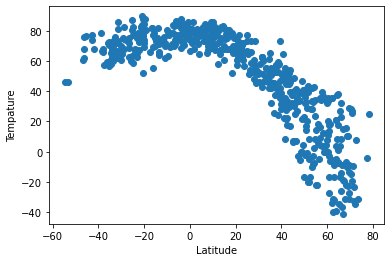

In [35]:

plt.scatter(city_data["Latitude"],city_data["Tempature"])
plt.xlabel("Latitude")
plt.ylabel("Tempature")
plt.show()

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression